In [1]:
#logistic regression

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt


In [3]:
def load_data(data_path):
    data_set = np.genfromtxt(data_path, delimiter=',')
    return data_set

In [4]:
def visualize_data(data, label_x, label_y, label_pos, label_neg):
    #get label 
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    plt.scatter(data[pos][:,0], data[pos][:,1], c='g', s=60, linewidth=2, label=label_pos)
    plt.scatter(data[neg][:,0], data[neg][:,1], c='r', s=60, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon= True, fancybox = True);
    plt.show()

In [5]:
def plot_decision_boundary(X, Y, theta, title, label_x, label_y, label_pos, label_neg):
    #get label
    m=X.shape[1]
    X=X.T
    Y=Y.T
    theta = theta.T
    neg = (Y == 0).reshape(m,1)
    pos = (Y == 1).reshape(m,1)
    
    
    plt.scatter(X[pos[:,0],1],X[pos[:,0],2], c="g", s = 60, label=label_pos)
    plt.scatter(X[neg[:,0],1],X[neg[:,0],2], c="r", s = 60, label=label_neg)
    
    x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
    y_value=-(theta[0] +theta[1]*x_value)/theta[2]
    plt.plot(x_value,y_value, "b")
    plt.title(title)
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(frameon= True, fancybox = True)
    plt.show()

In [6]:
def sigmoid(z):
    """
    return the sigmoid of z
    z: number, matrix, vector, etc.
    """
    return 1 / (1 + np.exp(-z))

In [7]:
def initialize_parameters(dim):
    theta = np.zeros((1, dim))
    return theta

In [8]:
def featureNormalization(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

In [9]:
def compute_cost_and_gradient(X, Y, theta):
    
    m = X.shape[1]
    
    #make prob predictions
    h = sigmoid(np.dot(theta, X))
    
    #Compute Cost
    logprobs = np.multiply(np.log(h), Y) + np.multiply(np.log(1-h), 1-Y)
    cost = - (1/m) * np.sum(logprobs)
    
    #convert to number. Example: [[1]] --> 1
    cost = float(np.squeeze(cost))
    
    #Compute gradient
    grad = (1/m)*np.dot(h-Y, X.transpose())
    
    return cost, grad

In [10]:
def gradient(X, Y, theta):
    m = X.shape[1]
    h = sigmoid(np.dot(theta, X))


    dtheta = (1/m)*np.dot(h-Y, X.T)

    return dtheta

In [11]:
def optimize(X,Y, theta, num_iterations = 10000, learning_rate=0.01):
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        
        #compute cost and gradient
        J, grad= compute_cost_and_gradient(X,Y,theta)
        
        #update theta
        theta = theta - learning_rate*grad
        
        costs.append(J)
            
            
    return theta, costs


In [12]:
def predict(theta, X):
    prediction = sigmoid(np.dot(theta, X))
    return prediction

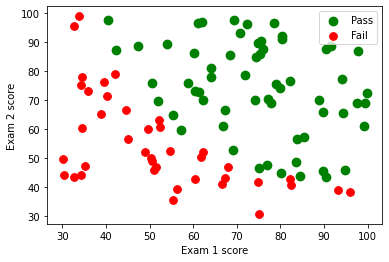

----Without normalization----
cost with theta (0,0): 0.6931471805599453
gradient with theta (0,0): [[ -0.1        -12.00921659 -11.26284221]]
----Feature Normalization----
cost with theta (0,0): 0.6931471805599453
gradient with theta (0,0): [[-0.1        -0.28122914 -0.25098615]]


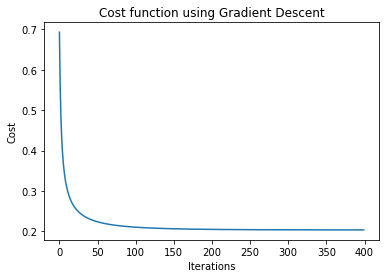

Theta after gradient descent:  [[1.65947664 3.8670477  3.60347302]]


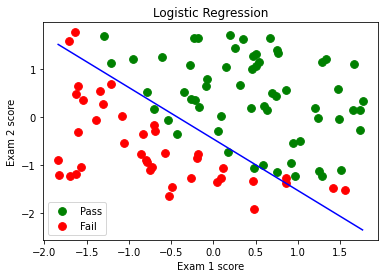

Predict with sample scores, Pass proba:  0.31487597172039383


In [13]:
if __name__ == "__main__":
    data_path = 'data2.csv'
    data_set = load_data(data_path)
    visualize_data(data_set, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail')
    
    #load training input to matrix X
    X_orgs = data_set[:, 0:2]

    #add 1's column to X
    m = X_orgs.shape[0]
    one = np.ones((X_orgs.shape[0], 1))
    X = np.concatenate((one, X_orgs), axis = 1)
    X = X.T
    
    #load label to matrix X
    Y = data_set[:, 2].reshape((1,X.shape[1]))

    #initialize the theta
    theta = initialize_parameters(X.shape[0])
    # X * theta ---> y 
    # dim X : [nx+1, m]
    # dim Y : [1, m]
    # dim theta : [1, nx+1]
    
    
    #check cost and gradient 
    print("----Without normalization----")
    J, grad = compute_cost_and_gradient(X, Y, theta)
    print("cost with theta (0,0):",J)
    print("gradient with theta (0,0):",grad)
    
    #feature normalization
    
    X_norm, X_mean, X_std = featureNormalization(X_orgs)
    X_norm = np.concatenate((one, X_norm), axis = 1)
    X_norm = X_norm.T
    
    #check cost and gradient 
    J, grad = compute_cost_and_gradient(X_norm, Y, theta)
    print("----Feature Normalization----")
    print("cost with theta (0,0):",J)
    print("gradient with theta (0,0):",grad)
    
    
    #optimize theta 
    theta, costs = optimize(X_norm, Y, theta, 400, 1)
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost function using Gradient Descent")
    plt.show()
    
    #print theta 
    print("Theta after gradient descent: ", theta)
    
    #plot decision boundary
    plot_decision_boundary(X_norm, Y, theta, "Logistic Regression", "Exam 1 score", "Exam 2 score", "Pass", "Fail")
    
    #predict 
    x = np.array([[40,80]])
    x_norm = (x - X_mean)/X_std
    x_norm = np.append(np.ones(1), x_norm)
    x_norm = (x_norm.reshape((1, x_norm.shape[0]))).T
    print("Predict with sample scores, Pass proba: ", predict(theta, x_norm)[0][0])
    